# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [366]:
m=1
p = 1#0.4
q = 0.1#0.1#0.01#0.9#0.01#0.5 #Pure SF is q=0
run = 1

1

Choose your grid

In [367]:
global compactified=true
global loggrid=false
global bisection=false
global zeroformat=false
global twod=false

false

In [368]:
using Quadmath, Printf

res=m;
N=2.0^m*500.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0
end

dx=Xf/N
if loggrid==false
    dt=0.5*round(dx,digits=10)
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt;

In [369]:
print(N)

500.0

In [370]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/YangMills/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/YangMills/DATA"

# Grid

In [436]:
using Printf
include("./YangMills.jl");

In [437]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
end;

step size is  0.002
the time step is 4.016047664754381e-5


# Initial data of m β Ψ and Ψ,x

In [438]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderxchiu=zeros(L)
initderxchi=zeros(L)
initderpsi=zeros(L)
initxchi=zeros(L)


#state array is m beta psi xchi,u xchi,r psi,r xchi r
#state_array=[initm initbeta initpsi initderxchiu initderxchi initderpsi initxchi initX];
#state array is m beta psi xxchi,u xchi,r psi,r xchi r
state_array=[initm initbeta initpsi initpi initderxchi initderpsi initxchi initX];
#xxchi,u=pi

#PSI,R
A=0.075*p*(1−q)
r0=0.75
sigma=0.25

initderpsi[4:L-3] = init_derpsi(initX1,r0,sigma,A)

state_array[:,6] = initderpsi
state_array=ghost(state_array)

#XCHI
A=0.25*p*q
r0=0.3
sigma=0.1

initxchi[4:L-3] = init_xchi(initX1,r0,sigma,A)

state_array[:,7] = initxchi

####
#PSI FROM PSI,R, CHI,R FROM CHI
xchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,7],  k=4);

state_array[4:L-3,5]=derivative(xchi_func, initX1; nu=1)#Der_array(state_array,7,initX)[4:L-3]

derxchi_func = Spline1D(initX[4:L-3], state_array[4:L-3,5],  k=4);
derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,6],  k=4);


funcs=[derxchi_func derpsi_func xchi_func];

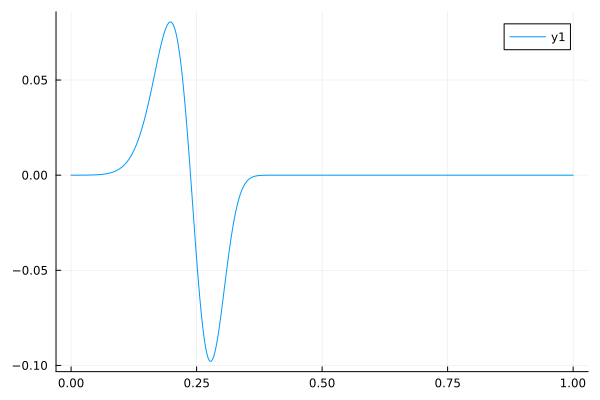

In [439]:
derivative(xchi_func, initX1; nu=1)
plot(initX1, derivative(xchi_func, initX1; nu=1))

In [440]:
y0=[0.0 0.0 0.0 0.0]

state_array[4:L-3,1:4] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,funcs,state_array[:,:]);

#state_array = ghost(state_array);

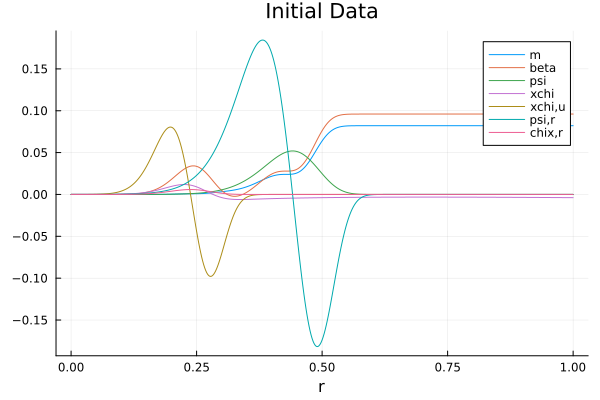

In [441]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:7], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "xchi" "xchi,u" "psi,r" "chix,r"])#,ylim=[-0.1,0.1])

In [442]:
function compactify(r)
    return r/(1+r)
end
function uncompactify(x)
    return x/(1-x)
end;

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [443]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "deruxchi", "derxchi", "derpsi", "xchi"]

print_muninn(files, 0, state_array[:,:],res,"w")

In [444]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [445]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0000001150762352


In [446]:
using Base.Threads
Threads.nthreads()

4

In [447]:
if m==1
    global dt=2e-8
elseif m==2
    global dt=1e-6
else
    global dt=1e-6/2
end

2.0e-8

 ## Time evolution

fixed grid

In [448]:
finaltime=3.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 4.016048123028341e-5, t=0.004016048125079961 speed is 0.4980020006562771, dx/dt=49.800200065627706


iteration 200 dt is 4.0160481171681826e-5, t=0.00803209624537655 speed is 0.4980020013829542, dx/dt=49.80020013829542


iteration 300 dt is 4.016048108032237e-5, t=0.012048144358250863 speed is 0.49800200251583887, dx/dt=49.80020025158389


iteration 400 dt is 4.0160480940503434e-5, t=0.016064192459721256 speed is 0.4980020042496356, dx/dt=49.800200424963556


iteration 500 dt is 4.016048072556078e-5, t=0.02008024054368852 speed is 0.49800200691498897, dx/dt=49.800200691498894


iteration 600 dt is 4.016048039226081e-5, t=0.024096288600644906 speed is 0.4980020110480086, dx/dt=49.80020110480086


iteration 700 dt is 4.0160479867649226e-5, t=0.028112336615390983 speed is 0.49800201755334983, dx/dt=49.800201755334975


iteration 800 dt is 4.016047902609513e-5, t=0.032128384563026496 speed is 0.49800202798887366, dx/dt=49.80020279888736


iteration 900 dt is 4.0160477

#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [216]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: InterruptException:

In [49]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [50]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

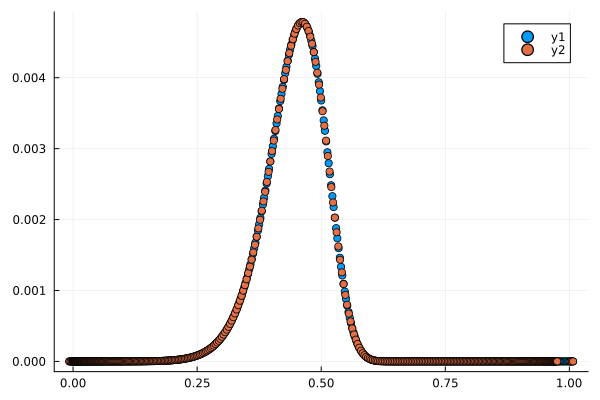

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

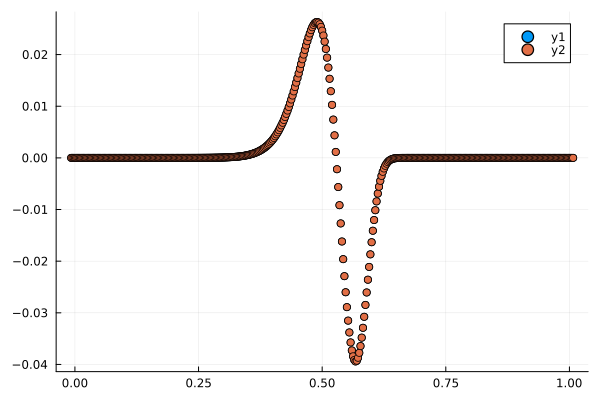

In [417]:
scatter([x1,x1],[y1,y2])